<a href="https://colab.research.google.com/github/Ha-minss/Personal-Projects/blob/main/Rename%20Dry-beans-Qualities%20-%20Classification-%20Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.model_selection import train_test_split
from sklearn.metrics import adjusted_rand_score
from sklearn.decomposition import PCA

In [2]:
import kagglehub
# Download latest version
path = kagglehub.dataset_download("muratkokludataset/dry-bean-dataset")
print("Path to dataset files:", path)

100%|██████████| 4.54M/4.54M [00:00<00:00, 38.9MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1


In [3]:
import os
for dirname, _, filenames in os.walk("/root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1"):
  for filename in filenames:
    print(os.path.join(dirname, filename))

/root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1/Dry_Bean_Dataset/Dry_Bean_Dataset_Citation_Request.txt
/root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1/Dry_Bean_Dataset/Dry_Bean_Dataset.xlsx
/root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1/Dry_Bean_Dataset/Dry_Bean_Dataset.arff


In [4]:
base_dir = "/root/.cache/kagglehub/datasets/muratkokludataset/dry-bean-dataset/versions/1"
xlsx_path = os.path.join(base_dir, "Dry_Bean_Dataset", "Dry_Bean_Dataset.xlsx")
df = pd.read_excel(xlsx_path)
display(df.shape)
display(df.head())

(13611, 17)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [5]:
df.info()
df.columns
df["Class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             13611 non-null  int64  
 1   Perimeter        13611 non-null  float64
 2   MajorAxisLength  13611 non-null  float64
 3   MinorAxisLength  13611 non-null  float64
 4   AspectRation     13611 non-null  float64
 5   Eccentricity     13611 non-null  float64
 6   ConvexArea       13611 non-null  int64  
 7   EquivDiameter    13611 non-null  float64
 8   Extent           13611 non-null  float64
 9   Solidity         13611 non-null  float64
 10  roundness        13611 non-null  float64
 11  Compactness      13611 non-null  float64
 12  ShapeFactor1     13611 non-null  float64
 13  ShapeFactor2     13611 non-null  float64
 14  ShapeFactor3     13611 non-null  float64
 15  ShapeFactor4     13611 non-null  float64
 16  Class            13611 non-null  object 
dtypes: float64(1

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [7]:
x = df.drop(columns=["Class"])
y = df["Class"]
x_n = df.drop(columns=["Class"]).astype(float).values
y_n = df["Class"].values

In [8]:
#결측치확인
missing = x.isnull().sum()
print(missing)

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
dtype: int64


In [9]:
# 이상치확인
z_scores = stats.zscore(x_n, axis = 0)
outlier_mask = (np.abs(z_scores) > 3).any(axis =1)
n_outliers = outlier_mask.sum()
print(n_outliers)
df_defect = df.loc[outlier_mask].reset_index(drop = True) # 불량콩
df_norm = df.loc[~outlier_mask].reset_index(drop = True) #정상콩

# 4) 정상 df_norm 에서 다시 X_norm, y_norm 분리
x_norm = df_norm.drop(columns=["Class"]).astype(float)  # DataFrame
y_norm = df_norm["Class"].values                        # ndarray

1124


In [10]:
#스케일링
SS = StandardScaler()
x_scaled = SS.fit_transform(x_norm)

In [11]:
#Train/Validation(또는 Test)으로 분할
train_input, test_input, train_output, test_output=train_test_split(x_norm,y_norm, test_size= 0.3, random_state= 42)

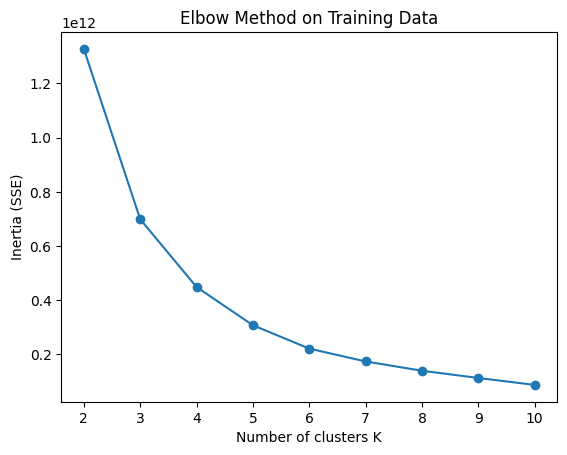

In [12]:
# Elbow >> finding the best K
inertia = []
Ks = range(2, 11)
for k in Ks:
    km = KMeans(n_clusters=k, random_state=42).fit(train_input)
    inertia.append(km.inertia_)

plt.plot(Ks, inertia, '-o')
plt.xlabel('Number of clusters K')
plt.ylabel('Inertia (SSE)')
plt.title('Elbow Method on Training Data')
plt.show()

In [13]:
for k in range(3,7):
  # Kmeans
  km = KMeans(n_clusters = k, random_state =42).fit(train_input)

  #labels
  labels_val = km.predict(test_input)

  # score
  sil = silhouette_score(test_input, labels_val)
  ari = adjusted_rand_score(test_output, labels_val)
  print(f"K={k}: Silhouette={sil:.3f}, ARI={ari:.3f}")

K=3: Silhouette=0.560, ARI=0.398
K=4: Silhouette=0.538, ARI=0.399
K=5: Silhouette=0.537, ARI=0.367
K=6: Silhouette=0.533, ARI=0.352


In [14]:
# Kmeans 3
km3 = KMeans(n_clusters= 3, random_state= 42).fit(train_input)
labels3 = km3.labels_

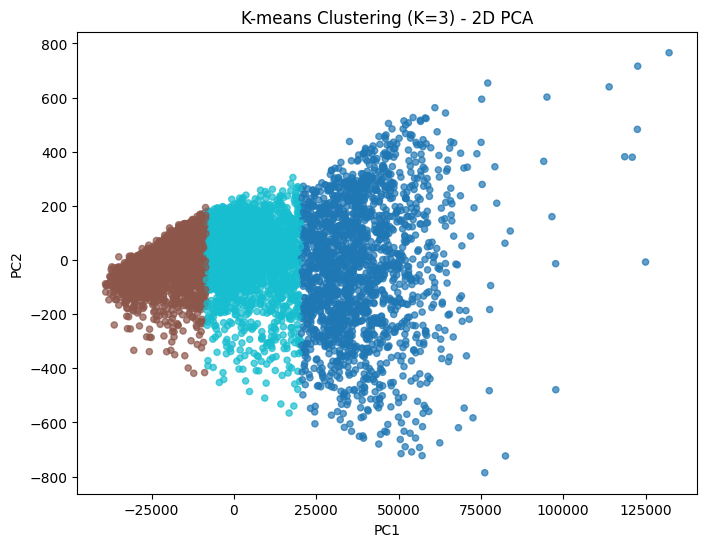

In [15]:
# PCA for 2D
pca2 = PCA(n_components=2)
X2d = pca2.fit_transform(train_input)

plt.figure(figsize=(8,6))
plt.scatter(X2d[:, 0], X2d[:, 1], c=labels3, cmap='tab10', s=20, alpha=0.7)
plt.title('K-means Clustering (K=3) - 2D PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

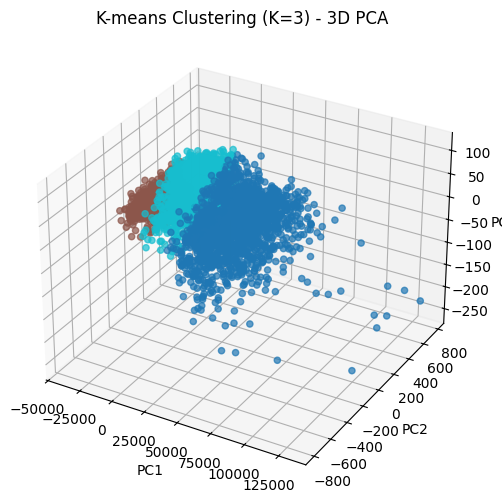

In [16]:
# PCA for 3D
pca3 = PCA(n_components=3)
X3d = pca3.fit_transform(train_input)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X3d[:, 0], X3d[:, 1], X3d[:, 2], c=labels3, cmap='tab10', s=20, alpha=0.7)
ax.set_title('K-means Clustering (K=3) - 3D PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [18]:
# Create PCA loadings DataFrame
feature_names = x_norm.columns.tolist()
pca3.fit(train_input)
loadings = pd.DataFrame(
    pca3.components_.T,
    index=feature_names,
    columns=['PC1', 'PC2', 'PC3']
)
display(loadings)

,PC1,PC2,PC3
Area,7.008233e-01,7.122058e-01,0.028798
Perimeter,6.563491e-03,-6.174312e-02,0.709392
MajorAxisLength,2.615696e-03,-1.027461e-03,0.636842
MinorAxisLength,1.118365e-03,7.057323e-03,-0.292428
AspectRation,4.278796e-06,-6.350060e-05,0.005888
Eccentricity,1.520864e-06,-5.693954e-05,0.001895
ConvexArea,7.132969e-01,-6.992008e-01,-0.036841
EquivDiameter,1.727835e-03,4.258323e-03,0.058725
Extent,-7.129893e-08,4.561167e-05,-0.000477
Solidity,-5.500789e-08,2.224570e-05,-0.000009


In [20]:
# 분산이큰 요소들을 선택
x_sel = df_norm[['ConvexArea','Area','Solidity']].astype(float)
x_sel_scaled = SS.fit_transform(x_sel)
x_sel_km3 = KMeans(n_clusters= 3, random_state = 42).fit(x_sel_scaled)
labels_x_sel = x_sel_km3.labels_
centroids = x_sel_km3.cluster_centers_

In [21]:
for i, c in enumerate(centroids):
    print(f"Cluster {i} centroid:", dict(zip(['ConvexArea','Area','Solidity'], c)))

Cluster 0 centroid: {'ConvexArea': np.float64(1.3879976483778977), 'Area': np.float64(1.3985538552704346), 'Solidity': np.float64(0.11953687780865468)}
Cluster 1 centroid: {'ConvexArea': np.float64(-0.5433867695722614), 'Area': np.float64(-0.542012823351097), 'Solidity': np.float64(0.3299840594826992)}
Cluster 2 centroid: {'ConvexArea': np.float64(1.154789338891413), 'Area': np.float64(1.134378657363136), 'Solidity': np.float64(-1.8980586298681377)}


In [28]:
# 실루엣계수
sil = silhouette_score(x_sel_scaled, labels_x_sel)
print(f"Silhouette Score (3 features): {sil:.3f}")

Silhouette Score (3 features): 0.504


In [22]:
# 0: 'High-Quality', 1: 'Mid-Quality', 2: 'Low-Qality' 적용
mapping = {0: 'High-Quality', 1: 'Mid-Quality', 2: 'Low-Qality'}
grades = [mapping[label] for label in x_sel_km3.labels_]
df_norm['Grade'] = grades

In [23]:
# 각 등급별 샘플 수
print(df_norm['Grade'].value_counts())

Grade
Mid-Quality     8771
High-Quality    2067
Low-Qality      1649
Name: count, dtype: int64


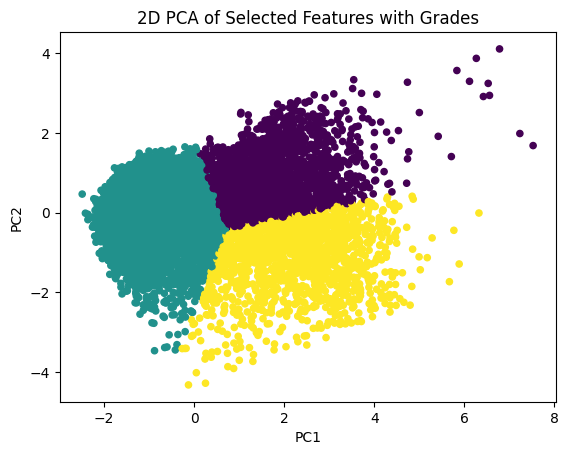

In [25]:
# 시각화
X2d = PCA(n_components=2).fit_transform(x_sel_scaled)  # 이미 스케일된 X_sel
plt.scatter(X2d[:,0], X2d[:,1], c=labels_x_sel, cmap='viridis', s=20)
plt.title("2D PCA of Selected Features with Grades")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Text(0.5, 0, 'Solidity (scaled)')

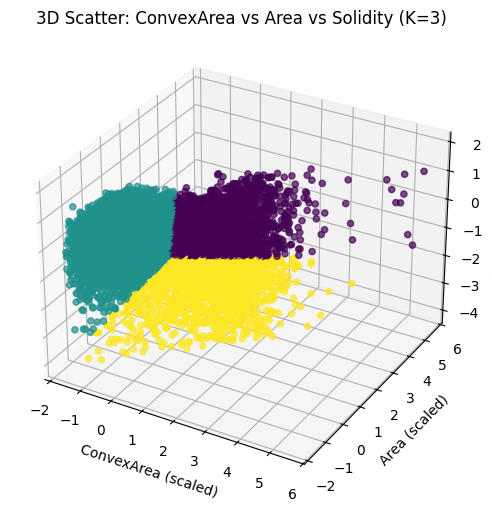

In [27]:
# 시각화
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    x_sel_scaled[:, 0],
    x_sel_scaled[:, 1],
    x_sel_scaled[:, 2],
    c=labels_x_sel,
    s=20,
    alpha=0.7
)
ax.set_title('3D Scatter: ConvexArea vs Area vs Solidity (K=3)')
ax.set_xlabel('ConvexArea (scaled)')
ax.set_ylabel('Area (scaled)')
ax.set_zlabel('Solidity (scaled)')

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


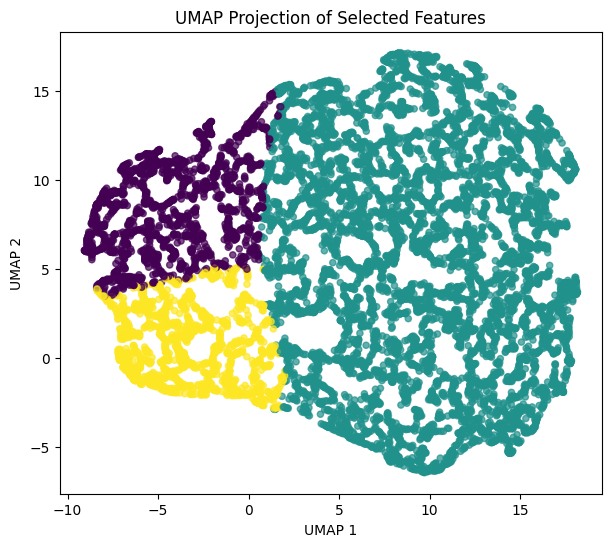

In [29]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42, n_neighbors=15, min_dist=0.1)
X_umap = reducer.fit_transform(x_sel_scaled)

plt.figure(figsize=(7,6))
plt.scatter(X_umap[:,0], X_umap[:,1],
            c=labels_x_sel, cmap='viridis', s=20, alpha=0.7)
plt.title("UMAP Projection of Selected Features")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.show()
